In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import Data
df = pd.read_csv('TLKM.JK.csv')
df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1422 non-null   object 
 1   Open       1421 non-null   float64
 2   High       1421 non-null   float64
 3   Low        1421 non-null   float64
 4   Close      1421 non-null   float64
 5   Adj Close  1421 non-null   float64
 6   Volume     1421 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.9+ KB


In [4]:
null_columns=df.columns[df.isnull().any()]
print(df[df["Open"].isnull()][null_columns])

     Open  High  Low  Close  Adj Close  Volume
636   NaN   NaN  NaN    NaN        NaN     NaN


In [5]:
df = df.drop([636])
df.reset_index(drop=True,inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0


In [7]:
# merubah tipe data object to datetime
df['Date'] = df['Date'].astype('datetime64')

# melihat tipe data dataframe
print(df.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object


In [8]:
print('waktu terawal dari kolom Date adalah:', df['Date'].min())
df.head()

waktu terawal dari kolom Date adalah: 2017-01-02 00:00:00


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0


In [9]:
# mengurutkan data berdasarkan waktu
df.sort_values('Date', inplace=True, ignore_index=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0


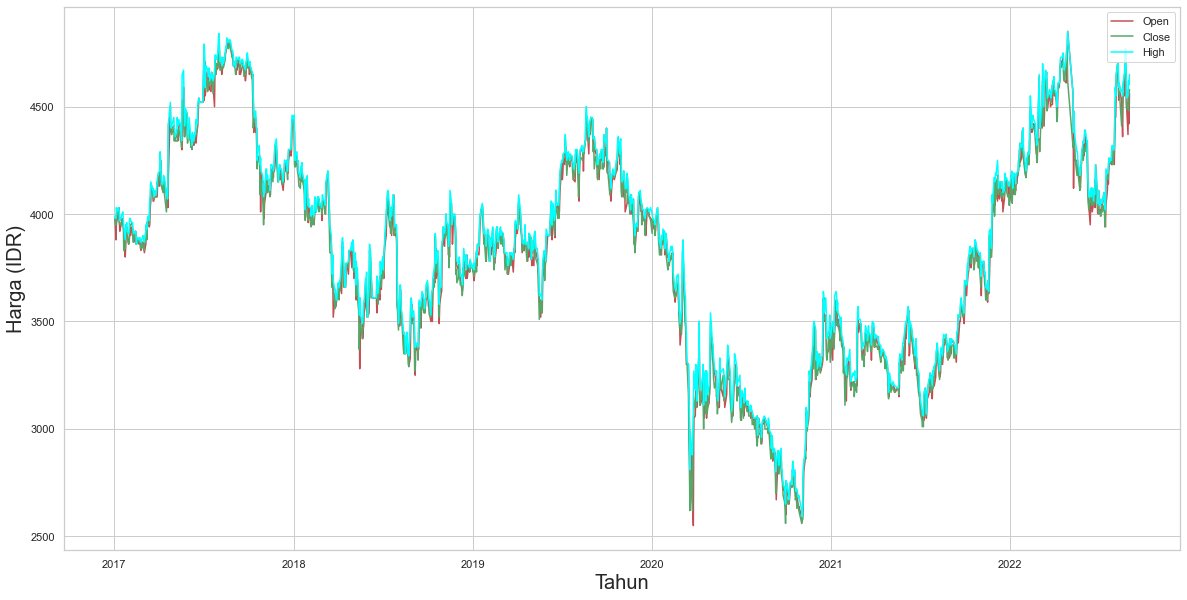

In [34]:
visual_plot =df[['Date','Close', 'Open', 'High']]

plt.figure(figsize=(20,10))

sns.lineplot(y=visual_plot['Open'], color="r", x=visual_plot['Date'])
sns.lineplot(y=visual_plot['Close'], color="g", x=visual_plot['Date'])
sns.lineplot(y=visual_plot['High'], color="cyan", x=visual_plot['Date'])

plt.xlabel('Tahun', fontsize=20)
plt.ylabel('Harga (IDR)', fontsize=20)
plt.legend(['Open','Close','High'], loc='upper right')

In [12]:
# split data
train_size = int(len(df) * 0.7) # Menentukan banyaknya data train yaitu sebesar 70% data
train = df[:train_size]
test =df[train_size:].reset_index(drop=True)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['Close']])

train['scaled'] = scaler.transform(train[['Open']])
test['scaled'] = scaler.transform(test[['Open']])
train['scaled'] = scaler.transform(train[['Close']])
test['scaled'] = scaler.transform(test[['Close']])

In [40]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,scaled,predict
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0,0.633929,NaN
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0,0.620536,NaN
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0,0.620536,NaN
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0,0.620536,NaN
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0,0.642857,NaN


In [41]:
def sliding_window(data, window_size):
    sub_seq, next_values = [], []
    for i in range(len(data)-window_size):
        sub_seq.append(data[i:i+window_size])
        next_values.append(data[i+window_size])
    X = np.stack(sub_seq)
    y = np.array(next_values)
    return X,y

In [42]:
window_size = 12

X_train, y_train = sliding_window(train[['scaled']].values, window_size)
X_test, y_test = sliding_window(test[['scaled']].values, window_size)

In [43]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(982, 12, 1) (982, 1)
(415, 12, 1) (415, 1)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM #, RNN, GRU 

In [45]:
def create_model(LSTM_unit=64, dropout=0.2): #jika ingin menggunakan RNN atau GRU ganti LSTM dengan GRU/RNN
    # create model
    model = Sequential()
    model.add(LSTM(units=LSTM_unit, input_shape=(window_size, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

In [46]:
LSTM_unit = [16,32,64,128]
dropout = [0.1,0.2]

In [47]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping

# create model
model = KerasRegressor(build_fn=create_model, epochs=25, validation_split=0.1, batch_size=32)

# define the grid search parameters
LSTM_unit = [16,32,64,128]
dropout=[0.1,0.2]
param_grid = dict(LSTM_unit=LSTM_unit, dropout=dropout)

In [48]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

In [49]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/25
28/28 [==============================] - 7s 54ms/step - loss: 0.0864 - mae: 0.2186 - val_loss: 0.0058 - val_mae: 0.0677
Epoch 2/25
28/28 [==============================] - 1s 22ms/step - loss: 0.0114 - mae: 0.0810 - val_loss: 0.0094 - val_mae: 0.0890
Epoch 3/25
28/28 [==============================] - 1s 18ms/step - loss: 0.0088 - mae: 0.0729 - val_loss: 0.0057 - val_mae: 0.0690
Epoch 4/25
28/28 [==============================] - 1s 19ms/step - loss: 0.0093 - mae: 0.0741 - val_loss: 0.0036 - val_mae: 0.0530
Epoch 5/25
28/28 [==============================] - 0s 17ms/step - loss: 0.0077 - mae: 0.0685 - val_loss: 0.0027 - val_mae: 0.0426
Epoch 6/25
28/28 [==============================] - 1s 18ms/step - loss: 0.0081 - mae: 0.0697 - val_loss: 0.0026 - val_mae: 0.0424
Epoch 7/25
28/28 [==============================] - 1s 20ms/step - loss: 0.0077 - mae: 0.0672 - val_loss: 0.0022 - val_mae: 0.0349
Epoch 8/25
28/28 [==============================] - 1s 22ms/step - loss: 0.0079 - m

In [50]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Mengambil model terbaik
best_model = grid_result.best_estimator_.model

Best: -0.002160 using {'LSTM_unit': 128, 'dropout': 0.1}
-0.002394 (0.001524) with: {'LSTM_unit': 16, 'dropout': 0.1}
-0.002740 (0.001411) with: {'LSTM_unit': 16, 'dropout': 0.2}
-0.002659 (0.001851) with: {'LSTM_unit': 32, 'dropout': 0.1}
-0.002969 (0.002015) with: {'LSTM_unit': 32, 'dropout': 0.2}
-0.002776 (0.001643) with: {'LSTM_unit': 64, 'dropout': 0.1}
-0.003234 (0.001594) with: {'LSTM_unit': 64, 'dropout': 0.2}
-0.002160 (0.001507) with: {'LSTM_unit': 128, 'dropout': 0.1}
-0.002494 (0.001143) with: {'LSTM_unit': 128, 'dropout': 0.2}


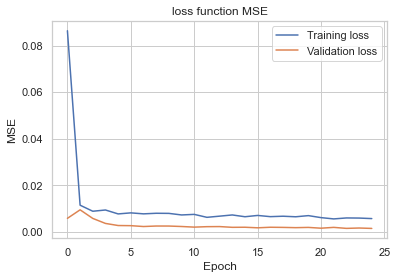

In [51]:
history = best_model.history
# grafik loss function MSE

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

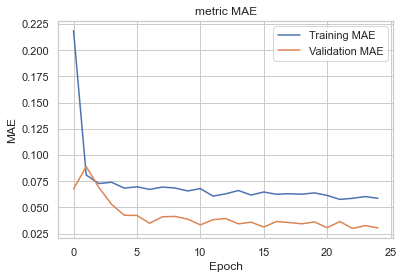

In [52]:
# grafik metric MAE

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('metric MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

In [53]:
# Prediksi data train
predict_train = scaler.inverse_transform(best_model.predict(X_train))
true_train = scaler.inverse_transform(y_train)

# Prediksi data test
predict_test = scaler.inverse_transform(best_model.predict(X_test))
true_test = scaler.inverse_transform(y_test)

13/13 [==============================] - 0s 9ms/step


<AxesSubplot:xlabel='Date', ylabel='Close'>

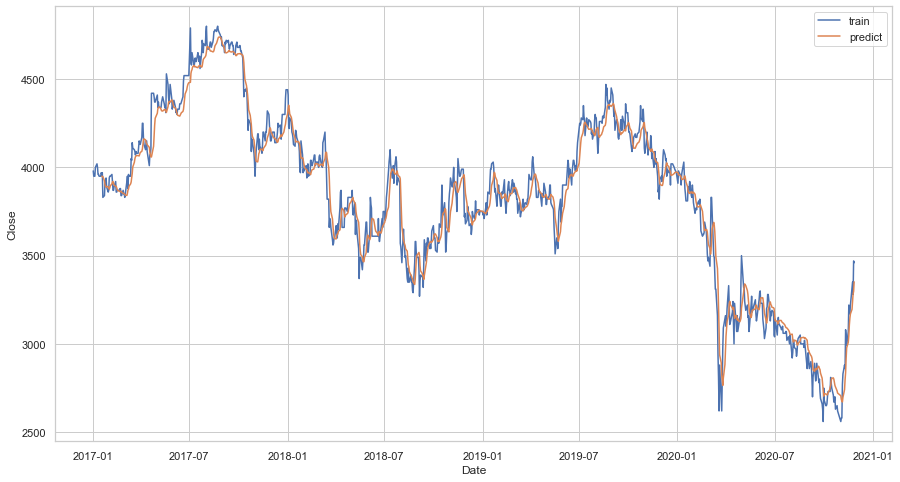

In [55]:
train['predict'] = np.nan
train['predict'][-len(predict_train):] = predict_train[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=train, x='Date', y='Close', label = 'train')
sns.lineplot(data=train, x='Date', y='predict', label = 'predict')

<AxesSubplot:xlabel='Date', ylabel='Close'>

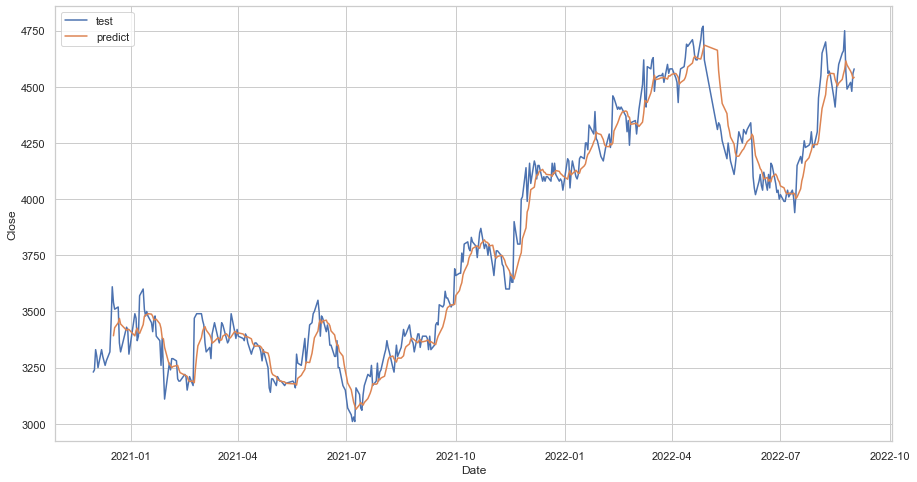

In [30]:
test['predict'] = np.nan
test['predict'][-len(predict_test):] = predict_test[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=test, x='Date', y='Close', label = 'test')
sns.lineplot(data=test, x='Date', y='predict', label = 'predict')

<AxesSubplot:xlabel='Date', ylabel='Close'>

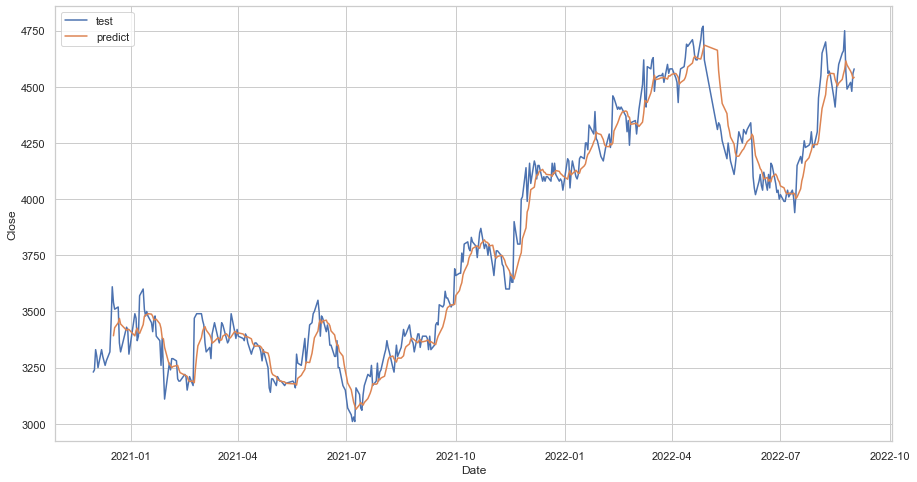

In [31]:
plt.figure(figsize=(15,8))
sns.lineplot(data=test[-24*30:], x='Date', y='Close', label = 'test')
sns.lineplot(data=test[-24*30:], x='Date', y='predict', label = 'predict')

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 51ms/step


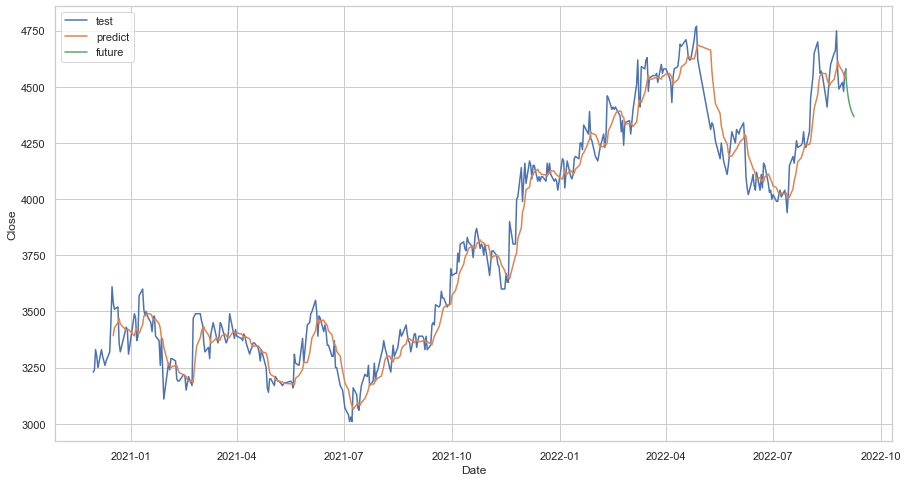

In [32]:
# forecasting data selanjutnya
y_test = scaler.transform(test[['Close']])
n_future = 24*7
future = [[y_test[-1,0]]]
X_new = y_test[-window_size:,0].tolist()

for i in range(n_future):
    y_future = best_model.predict(np.array([X_new]).reshape(1,window_size,1))
    future.append([y_future[0,0]])
    X_new = X_new[1:]
    X_new.append(y_future[0,0])

future = scaler.inverse_transform(np.array(future))
date_future = pd.date_range(start=test['Date'].values[-1], periods=n_future+1, freq='H')
# Plot Data sebulan terakhir dan seminggu ke depan
plt.figure(figsize=(15,8))
sns.lineplot(data=test[-24*30:], x='Date', y='Close', label = 'test')
sns.lineplot(data=test[-24*30:], x='Date', y='predict', label = 'predict')
sns.lineplot(x=date_future, y=future[:,0], label = 'future')
plt.ylabel('Close');
